In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler


In [2]:
# Load Data
iris = load_iris()
X, y = iris.data, iris.target.reshape(-1,1)


In [3]:
# One-hot encode target
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

In [4]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [5]:
# Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Build model with different activations
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))     # hidden layer (ReLU)
model.add(Dense(6, activation='tanh'))                  # hidden layer (Tanh)
model.add(Dense(3, activation='softmax'))               # output layer (Softmax for 3 classes)

c:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
# Train
history = model.fit(X_train, y_train, epochs=50, batch_size=5, validation_data=(X_test, y_test), verbose=0)

In [9]:
# Evaluate
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {acc*100:.2f}%")


Test Accuracy: 100.00%


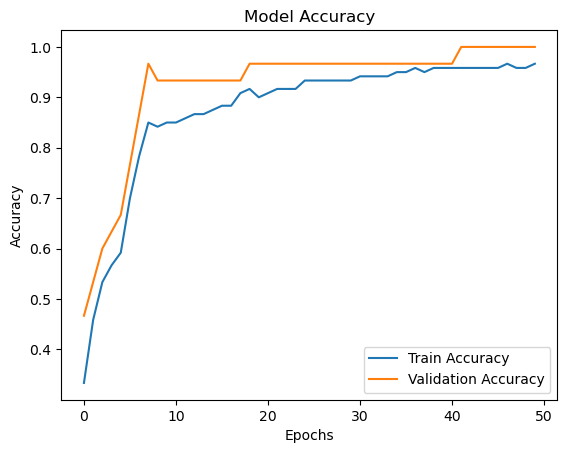

In [10]:
import matplotlib.pyplot as plt

# Plot Training & Validation Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

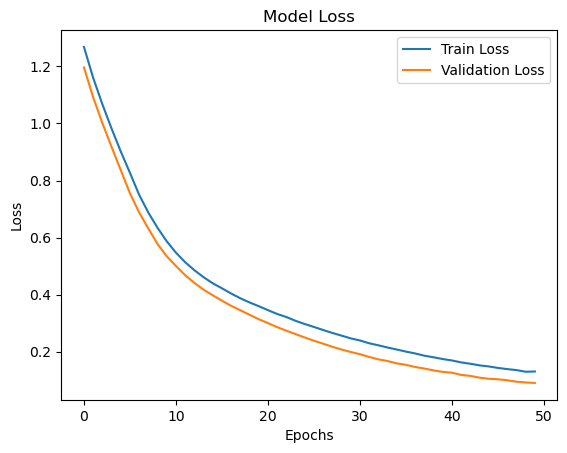

In [11]:
# Plot Training & Validation Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()